In [22]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, mean_squared_error, mean_absolute_error
import os
plt.rcParams["font.family"] = "serif"
plt.rcParams["pdf.fonttype"] = 42

In [23]:
df=pd.read_csv('./heart_disease/data/framingham.csv')
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [3]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [4]:
df["education"] = df["education"].fillna(df["education"].mean())
df["cigsPerDay"] = df["cigsPerDay"].fillna(df["cigsPerDay"].mean())
df["BPMeds"] = df["BPMeds"].fillna(df["BPMeds"].mean())
df["totChol"] = df["totChol"].fillna(df["totChol"].mean())
df["heartRate"] = df["heartRate"].fillna(df["heartRate"].mean())
df["glucose"] = df["glucose"].fillna(df["glucose"].mean())
df["BMI"] = df["BMI"].fillna(df["BMI"].mean())
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

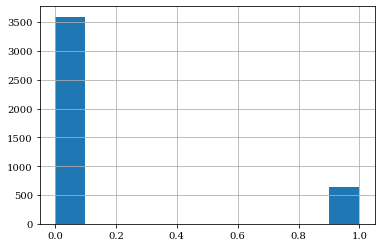

In [5]:
df["TenYearCHD"].hist();

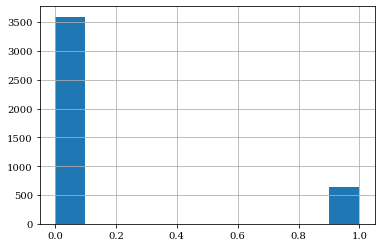

In [6]:
df["TenYearCHD"] = df["TenYearCHD"].apply(lambda x: 1 if x >= 0.5 else 0)
df["TenYearCHD"].hist();

In [7]:
Y = df["TenYearCHD"]
X = df.drop("TenYearCHD", axis=1) 

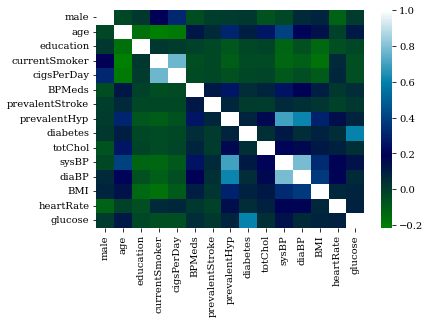

In [8]:
cor_matrix = X.corr()
sns.heatmap(cor_matrix, annot=False, cmap = "ocean");

In [9]:
train_ratio = 0.70
test_ratio = 0.15
validation_ratio = 0.15

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_ratio)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=validation_ratio/(train_ratio+test_ratio))

In [10]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the dataframe to perform min-max scaling
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_valid = pd.DataFrame(scaler.fit_transform(X_valid), columns=X_valid.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(2966, 15)
(636, 15)
(636, 15)


# Generate Decision Tree Model.

In [11]:
dt_model = DecisionTreeClassifier()
param_grid = {
    "criterion": ["gini", "entropy"],
    'max_depth': [5, 10, 15],
    'max_features':["sqrt", "log2", None]
}

grid_search_dt = GridSearchCV(dt_model, param_grid, cv=5)
# fit the grid search object to the training data
grid_search_dt.fit(X_train, Y_train)

# get the best hyperparameters
best_params_dt = grid_search_dt.best_params_

# create a new random forest regressor with the best hyperparameters
dt_model = DecisionTreeClassifier(max_depth=best_params_dt['max_depth'], criterion=best_params_dt["criterion"], max_features=best_params_dt['max_features'])

# fit the model to the training data
dt_model.fit(X_train, Y_train)

# generate predictions on the training data
dt_train_pred = dt_model.predict(X_train)

# evaluate the model on the validation data
dt_valid_pred = dt_model.predict(X_valid)

# generate predictions on the testing data
dt_test_pred = dt_model.predict(X_test)

rmse_dt_valid = mean_squared_error(Y_valid, dt_valid_pred, squared=False)
mae_dt_valid = mean_absolute_error(Y_valid, dt_valid_pred)
rmse_dt_test = mean_squared_error(Y_test, dt_test_pred, squared=False)
mae_dt_test= mean_absolute_error(Y_test, dt_test_pred)

accuracy_dt_valid = accuracy_score(Y_valid, dt_valid_pred)
accuracy_dt_test = accuracy_score(Y_test, dt_test_pred)

print("Best Hyperparameters: ", best_params_dt)
print("\nValidation's RMSE: {:.3f}".format(rmse_dt_valid))
print("Validation's MAE: {:.3f}".format(mae_dt_valid))
print("Validation's Acc: {:.3f}\n".format(accuracy_dt_valid))

print("Test's RMSE: {:.3f}".format(rmse_dt_test))
print("Test's MAE: {:.3f}".format(mae_dt_test))
print("Test's Acc: {:.3f}".format(accuracy_dt_test))

Best Hyperparameters:  {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt'}

Validation's RMSE: 0.402
Validation's MAE: 0.162
Validation's Acc: 0.838

Test's RMSE: 0.366
Test's MAE: 0.134
Test's Acc: 0.866


# Random Forest Model.

In [12]:
rf_model = RandomForestClassifier()
param_grid_rf = {
    "criterion": ["gini", "entropy"],
    'n_estimators': [100, 500, 1000],
    'max_depth': [5, 10, 15]
}

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5)
# fit the grid search object to the training data
grid_search_rf.fit(X_train, Y_train)

# get the best hyperparameters
best_params_rf = grid_search_rf.best_params_

# create a new random forest regressor with the best hyperparameters
rf_model = RandomForestClassifier(n_estimators=best_params_rf['n_estimators'], max_depth=best_params_rf['max_depth'], criterion=best_params_rf["criterion"])

# fit the model to the training data
rf_model.fit(X_train, Y_train)

# generate predictions on the training data
rf_train_pred = rf_model.predict(X_train)

# evaluate the model on the validation data
rf_valid_pred = rf_model.predict(X_valid)

# generate predictions on the testing data
rf_test_pred = rf_model.predict(X_test)

rmse_rf_valid = mean_squared_error(Y_valid, rf_valid_pred, squared=False)
mae_rf_valid = mean_absolute_error(Y_valid, rf_valid_pred)
rmse_rf_test = mean_squared_error(Y_test, rf_test_pred, squared=False)
mae_rf_test= mean_absolute_error(Y_test, rf_test_pred)

accuracy_rf_valid = accuracy_score(Y_valid, rf_valid_pred)
accuracy_rf_test = accuracy_score(Y_test, rf_test_pred)

print("Best Hyperparameters: ", best_params_rf)
print("\nValidation's RMSE: {:.3f}".format(rmse_rf_valid))
print("Validation's MAE: {:.3f}".format(mae_rf_valid))
print("Validation's Acc: {:.3f}\n".format(accuracy_rf_valid))

print("Test's RMSE: {:.3f}".format(rmse_rf_test))
print("Test's MAE: {:.3f}".format(mae_rf_test))
print("Test's Acc: {:.3f}".format(accuracy_rf_test))

Best Hyperparameters:  {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}

Validation's RMSE: 0.402
Validation's MAE: 0.162
Validation's Acc: 0.838

Test's RMSE: 0.363
Test's MAE: 0.132
Test's Acc: 0.868


# eXtreme Gradient Boosting (XGB) modeling.

In [13]:
# Define the XGBoost model
xgb_model = xgb.XGBClassifier()

# Define the hyperparameter grid
param_grid_xgb = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 6, 9],
    'colsample_bytree': [0.5, 0.7, 1.0],
}

# Perform grid search
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    cv=5
)

grid_search_xgb.fit(X_train, Y_train, verbose=False)

# Get the best hyperparameters
best_params_xgb = grid_search_xgb.best_params_

# Create a new XGBoost model with the best hyperparameters
xgb_model = xgb.XGBClassifier(
    n_estimators=best_params_xgb['n_estimators'],
    learning_rate=best_params_xgb['learning_rate'],
    max_depth=best_params_xgb['max_depth'],
    colsample_bytree=best_params_xgb['colsample_bytree']
)

# Fit the model with the best hyperparameters on the training data
xgb_model.fit(X_train, Y_train, verbose=False)

# Generate predictions on the training data
xgb_train_pred = xgb_model.predict(X_train)

# Generate predictions on the validation data
xgb_valid_pred = xgb_model.predict(X_valid)

# generate predictions on the testing data
xgb_test_pred = xgb_model.predict(X_test)

# Evaluate the model on the validation data
rmse_xgb_valid = mean_squared_error(Y_valid, xgb_valid_pred, squared=False)
mae_xgb_valid = mean_absolute_error(Y_valid, xgb_valid_pred)

# Evaluate the model on the testing data
rmse_xgb_test = mean_squared_error(Y_test, xgb_test_pred, squared=False)
mae_xgb_test= mean_absolute_error(Y_test, xgb_test_pred)

accuracy_xgb_valid = accuracy_score(Y_valid, xgb_valid_pred)
accuracy_xgb_test = accuracy_score(Y_test, xgb_test_pred)

# Print the results
print("Best Hyperparameters: ", best_params_xgb)
print("\nValidation's RMSE: {:.3f}".format(rmse_xgb_valid))
print("Validation's MAE: {:.3f}".format(mae_xgb_valid))
print("Validation's Acc: {:.3f}\n".format(accuracy_xgb_valid))

print("Test's RMSE: {:.3f}".format(rmse_xgb_test))
print("Test's MAE: {:.3f}".format(mae_xgb_test))
print("Test's Acc: {:.3f}\n".format(accuracy_xgb_test))

Best Hyperparameters:  {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 100}

Validation's RMSE: 0.404
Validation's MAE: 0.164
Validation's Acc: 0.836

Test's RMSE: 0.361
Test's MAE: 0.131
Test's Acc: 0.869



# Neural Network Classifier.

In [14]:
# Define the MLPClassifier model
NN_model = MLPClassifier()

# Define the hyperparameter grid
param_grid_NN = {
    'hidden_layer_sizes': [(64, 32, 16, 8, 4, 2), (32, 16, 8, 4, 2), (64, 32, 16, 4, 2),(256, 128, 64, 32, 16, 8, 4, 2)],
    'max_iter': [1000, 2000, 3000],
    'alpha': [0.1, 0.01, 0.001],
    'activation': ['tanh', 'logistic', 'relu']
}

# Perform grid search
grid_search_NN = GridSearchCV(
    estimator=NN_model,
    param_grid=param_grid_NN,
    cv=5
)

grid_search_NN.fit(X_train, Y_train)

# Get the best hyperparameters
best_params_NN = grid_search_NN.best_params_

# Create a new MLPClassifier model with the best hyperparameters
NN_model = MLPClassifier(
    hidden_layer_sizes=best_params_NN['hidden_layer_sizes'],
    max_iter=best_params_NN['max_iter'],
    alpha=best_params_NN['alpha'],
    activation=best_params_NN['activation']
)

# Fit the model with the best hyperparameters on the training data
NN_model.fit(X_train, Y_train)

# Generate predictions on the training data
NN_train_pred = NN_model.predict(X_train)

# Generate predictions on the validation data
NN_valid_pred = NN_model.predict(X_valid)

# generate predictions on the testing data
NN_test_pred = NN_model.predict(X_test)

# Evaluate the model on the validation data
rmse_NN_valid = mean_squared_error(Y_valid, NN_valid_pred, squared=False)
mae_NN_valid = mean_absolute_error(Y_valid, NN_valid_pred)

# Evaluate the model on the testing data
rmse_NN_test = mean_squared_error(Y_test, NN_test_pred, squared=False)
mae_NN_test = mean_absolute_error(Y_test, NN_test_pred)

accuracy_NN_valid = accuracy_score(Y_valid, NN_valid_pred)
accuracy_NN_test = accuracy_score(Y_test, NN_test_pred)

# Print the results
print("Best Hyperparameters: ", best_params_NN)
print("\nValidation's RMSE: {:.3f}".format(rmse_NN_valid))
print("Validation's MAE: {:.3f}".format(mae_NN_valid))
print("Validation's Acc: {:.3f}\n".format(accuracy_NN_valid))

print("Test's RMSE: {:.3f}".format(rmse_NN_test))
print("Test's MAE: {:.3f}".format(mae_NN_test))
print("Test's Acc: {:.3f}\n".format(accuracy_NN_test))

Best Hyperparameters:  {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (256, 128, 64, 32, 16, 8, 4, 2), 'max_iter': 3000}

Validation's RMSE: 0.399
Validation's MAE: 0.159
Validation's Acc: 0.841

Test's RMSE: 0.372
Test's MAE: 0.138
Test's Acc: 0.862



# Plot the RMSE, MAE, and Accuracy values for the Validation and Testing dataset.

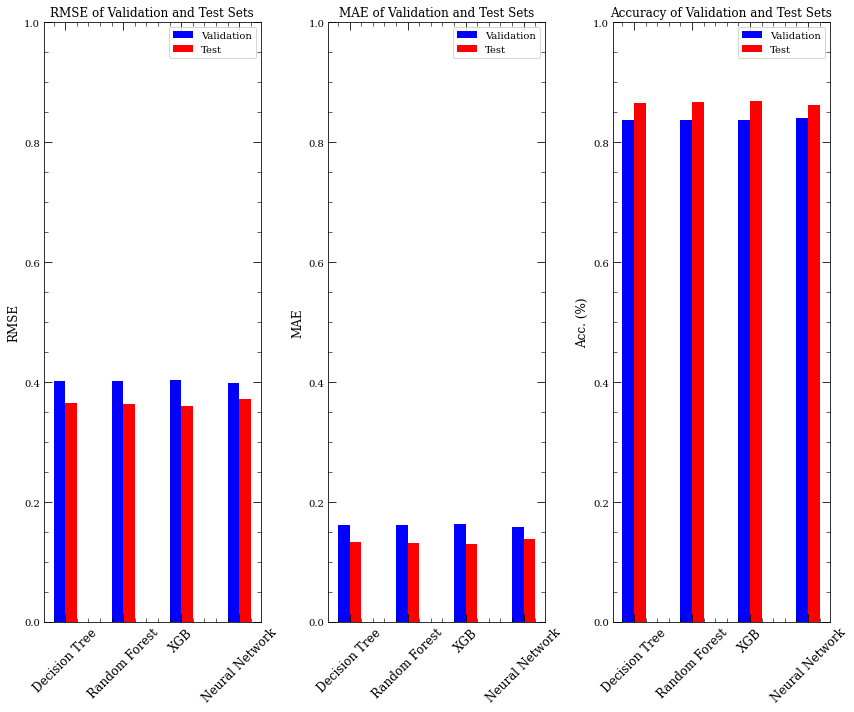

In [24]:
rmse_valid = [rmse_dt_valid, rmse_rf_valid, rmse_xgb_valid, rmse_NN_valid]
mae_valid = [mae_dt_valid, mae_rf_valid, mae_xgb_valid, mae_NN_valid]

rmse_test = [rmse_dt_test, rmse_rf_test, rmse_xgb_test, rmse_NN_test]
mae_test = [mae_dt_test, mae_rf_test, mae_xgb_test, mae_NN_test]

acc_valid = [accuracy_dt_valid, accuracy_rf_valid, accuracy_xgb_valid, accuracy_NN_valid]
acc_test = [accuracy_dt_test, accuracy_rf_test, accuracy_xgb_test, accuracy_NN_test]

model_labels = ['Decision Tree', 'Random Forest', 'XGB', 'Neural Network']

train_positions = np.arange(len(model_labels))
bar_width = 0.2  # Width of each bar

plt.figure(figsize=(12, 10))

ax1 = plt.subplot(1, 3, 1)
ax1.bar(train_positions - bar_width/2, rmse_valid, color='blue', width=bar_width, label='Validation')
ax1.bar(train_positions + bar_width/2, rmse_test, color='red', width=bar_width, label='Test')
ax1.set_title('RMSE of Validation and Test Sets', fontsize=12)
ax1.set_ylabel('RMSE', fontsize=12)
ax1.set_ylim(0, 1)
ax1.set_xticks(train_positions)
ax1.set_xticklabels(model_labels, fontsize=12, rotation=45)
ax1.legend(loc="best")
ax1.minorticks_on()
ax1.tick_params(top=True, right=True, which='both', direction='in', length=8)
ax1.tick_params(top=True, right=True, which='minor', direction='in', length=4)

ax2 = plt.subplot(1, 3, 2)
ax2.bar(train_positions - bar_width/2, mae_valid, color='blue', width=bar_width, label='Validation')
ax2.bar(train_positions + bar_width/2, mae_test, color='red', width=bar_width, label='Test')
ax2.set_title('MAE of Validation and Test Sets', fontsize=12)
ax2.set_ylabel('MAE', fontsize=12)
ax2.set_ylim(0, 1)
ax2.set_xticks(train_positions)
ax2.set_xticklabels(model_labels, fontsize=12, rotation=45)
ax2.legend(loc="best")
ax2.minorticks_on()
ax2.tick_params(top=True, right=True, which='both', direction='in', length=8)
ax2.tick_params(top=True, right=True, which='minor', direction='in', length=4)

ax3 = plt.subplot(1, 3, 3)
ax3.bar(train_positions - bar_width/2, acc_valid, color='blue', width=bar_width, label='Validation')
ax3.bar(train_positions + bar_width/2, acc_test, color='red', width=bar_width, label='Test')
ax3.set_title('Accuracy of Validation and Test Sets', fontsize=12)
ax3.set_ylabel('Acc. (%)', fontsize=12)
ax3.set_ylim(0, 1)
ax3.set_xticks(train_positions)
ax3.set_xticklabels(model_labels, fontsize=12, rotation=45)
ax3.legend(loc="best")
ax3.minorticks_on()
ax3.tick_params(top=True, right=True, which='both', direction='in', length=8)
ax3.tick_params(top=True, right=True, which='minor', direction='in', length=4)

plt.tight_layout()
plt.savefig("./heart_disease/images/metrics.png")
plt.show()

# Pick the Neural Network model.

In [18]:
Y_train_proba = NN_model.predict_proba(X_train)[:, 1] # Probability of positive class
Y_valid_proba = NN_model.predict_proba(X_valid)[:, 1] # Probability of positive class

# Calculate evaluation metrics for the validation dataset
accuracy = accuracy_score(Y_valid, NN_valid_pred)
precision = precision_score(Y_valid, NN_valid_pred, average="binary")
recall = recall_score(Y_valid, NN_valid_pred, average="binary")
f1 = f1_score(Y_valid, NN_valid_pred, average="binary")
train_auc = roc_auc_score(Y_train, Y_train_proba)
valid_auc = roc_auc_score(Y_valid, Y_valid_proba)
conf_matrix = confusion_matrix(Y_valid, NN_valid_pred)
cv_scores = cross_val_score(NN_model, X, Y, cv=5)
rmse = mean_squared_error(Y_valid, NN_valid_pred, squared=False) 
mae = mean_absolute_error(Y_valid, NN_valid_pred)

#Print the evaluation metrics
print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1-Score: {:.3f}".format(f1))
print("RMSE: {:.3f}".format(rmse))
print("MAE: {:.3f}".format(mae))
print("Train AUC: {:.3f}".format(train_auc))
print("Valid AUC: {:.3f}".format(valid_auc))
print('Mean CV score: {:.3f}'.format(cv_scores.mean()))
print("Confusion matrix:\n", conf_matrix)

Accuracy: 0.841
Precision: 0.579
Recall: 0.106
F1-Score: 0.179
RMSE: 0.399
MAE: 0.159
Train AUC: 0.747
Valid AUC: 0.728
Mean CV score: 0.847
Confusion matrix:
 [[524   8]
 [ 93  11]]


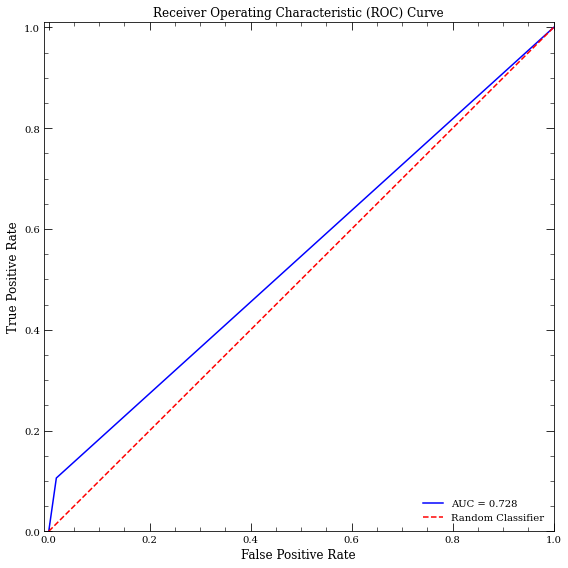

In [25]:
fig, ax = plt.subplots(figsize=(8, 8))
# Compute the false positive rate, true positive rate, and threshold values required for plotting the ROC curve
fpr, tpr, thresholds = roc_curve(Y_valid, NN_valid_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(valid_auc), color="blue")
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier', color="red")
plt.xlabel('False Positive Rate', fontsize=12)

ax.minorticks_on()
ax.xaxis.set_ticks_position("both")
ax.tick_params(top=True, right=True, which='major', direction='in', length=8, labelbottom=True, labeltop=False)
ax.tick_params(top=True, right=True, which='minor', direction='in', length=4)
ax.set_ylim(0,1.01)
ax.set_xlim(-0.01,1)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=12)
plt.legend(loc="lower right", frameon=False)
fig.tight_layout()
plt.savefig("./heart_disease/images/roc.png")
plt.show();